In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from marriage import decorate, value_counts

In [2]:
%load_ext autoreload
%autoreload 2

%load_ext nb_black

ERROR:root:Cannot parse: 4:0: %load_ext nb_black
Traceback (most recent call last):
  File "/home/downey/miniconda3/envs/MarriageNSFG/lib/python3.10/site-packages/nb_black.py", line 62, in __format
    cell = _format_code(cell)
  File "/home/downey/miniconda3/envs/MarriageNSFG/lib/python3.10/site-packages/nb_black.py", line 22, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1225, in format_str
  File "src/black/__init__.py", line 1239, in _format_str_once
  File "src/black/parsing.py", line 90, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 4:0: %load_ext nb_black


In [3]:
df = pd.read_hdf("FemMarriageData.hdf", "FemMarriageData")
df.shape

(75769, 37)

<IPython.core.display.Javascript object>

In [15]:
df.columns

Index(['evrmarry', 'ager', 'rmarital', 'nchildhh', 'parity', 'fmarno',
       'mardat01', 'marend01', 'mardis01', 'intent', 'addexp', 'finalwgt',
       'cmintvw', 'divorced', 'separated', 'widowed', 'stillma', 'cmbirth',
       'cmmarrhx', 'cmdivorcx', 'cycle', 'agemarry', 'missing', 'year',
       'age_index', 'agemarry_index', 'birth_index', 'caseid', 'mar1diss',
       'timesmar', 'cmstphsbx', 'marstat', 'ageint', 'currentcm', 'firstcm',
       'mar2p', 'fmarital', 'age_group', 'intent_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [37]:
df.groupby("cycle")["finalwgt"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,67886.793450,62766.997833,6022.000000,16643.000000,37818.000000,104203.000000,6.588880e+05
4,8450.0,685207.105089,419209.971920,19741.000000,326658.000000,709094.500000,888281.000000,5.499660e+06
5,10847.0,5549.977323,2668.618457,349.876100,3648.050800,5534.631900,6642.457950,3.354982e+04
6,7643.0,8054.522410,7342.734883,118.656790,4175.880599,6553.169964,9590.027246,2.618800e+05
7,12279.0,5029.297260,5527.506822,41.084436,1577.777464,3040.704205,6087.405502,3.022635e+04
8,5601.0,10870.802178,12606.086581,1714.541000,4143.177321,6744.820880,12344.571351,8.520795e+04
9,5699.0,10789.922092,11292.680457,1859.105000,4382.507056,7124.422412,12611.500388,7.539941e+04
10,5554.0,13002.896291,15811.370555,1924.916000,4641.329178,7513.585309,14818.169985,1.067744e+05
11,6141.0,11833.891223,13074.819563,1340.862000,4246.620623,7464.253280,13868.904073,8.333213e+04


<IPython.core.display.Javascript object>

In [94]:
pd.crosstab(df["parity"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
parity,,,,,,,,,,
0.0,3356,3122,3936,3230,5596,2460,2632,2404,2826,2833
1.0,1448,1559,2072,1519,2214,1043,1040,1011,1039,931
2.0,1605,2109,2654,1603,2360,1100,1057,1159,1201,1009
3.0,895,1040,1418,828,1313,640,621,626,670,488
4.0,373,364,518,309,496,232,228,243,262,202
5.0,154,162,156,95,181,86,82,67,79,65
6.0,83,58,51,29,74,23,22,25,44,31
7.0,29,23,21,15,26,12,11,13,10,12
8.0,17,10,15,8,8,3,4,3,6,5


<IPython.core.display.Javascript object>

In [95]:
trimmed = df["parity"] > 12
df.loc[trimmed, "parity"] = np.nan

<IPython.core.display.Javascript object>

In [98]:
pd.crosstab(df["addexp"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
addexp,,,,,,,,,,
0.0,3566,4529,5791,3739,5524,2494,2550,2865,3229,3634
0.5,63,75,132,27,46,21,23,23,23,20
1.0,1393,1311,1694,1443,2342,1131,1168,1003,1069,656
1.5,197,222,376,26,56,22,21,18,35,17
2.0,1579,1452,1649,1585,2732,1257,1313,1060,1149,869
2.5,229,183,300,7,15,5,8,4,6,3
3.0,534,425,538,516,1030,443,421,381,446,286
3.5,78,39,104,2,7,2,0,0,1,0
4.0,221,151,168,207,367,161,137,136,134,76


<IPython.core.display.Javascript object>

In [99]:
trimmed = df["addexp"] > 12
df.loc[trimmed, "addexp"] = np.nan

<IPython.core.display.Javascript object>

In [4]:
pd.crosstab(df["age_index"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
age_index,,,,,,,,,,
14.0,0,3,14,0,0,0,0,0,0,0
15.0,269,204,243,202,418,170,176,166,166,132
16.0,300,233,290,231,424,205,186,196,197,124
17.0,370,269,280,232,445,207,240,178,219,142
18.0,480,258,289,238,488,224,211,210,192,170
19.0,469,253,293,238,494,229,191,174,196,162
20.0,342,267,283,256,412,182,159,101,131,127
21.0,282,231,285,271,412,200,178,136,138,113
22.0,280,282,297,281,431,176,193,157,170,124


<IPython.core.display.Javascript object>

In [5]:
age_min = 14
age_max = 55
age_step = 3
age_bins = np.arange(age_min, age_max, age_step)

df["age_group"] = np.digitize(df["ager"], age_bins) * age_step
df["age_group"] += age_min - 2
df.loc[df["ager"].isnull(), "age_index"] = np.nan

<IPython.core.display.Javascript object>

In [6]:
from utils import round_into_bins

df["age_group"] = round_into_bins(df["ager"], 3, low=14) + 1

<IPython.core.display.Javascript object>

In [7]:
pd.crosstab(df["age_group"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
age_group,,,,,,,,,,
15.0,569,440,547,433,842,375,362,362,363,256
18.0,1319,780,862,708,1427,660,642,562,607,474
21.0,904,780,865,808,1255,558,530,394,439,364
24.0,864,841,963,816,1293,599,661,542,574,389
27.0,923,945,1011,775,1445,635,611,554,605,473
30.0,882,1022,1223,827,1395,657,621,547,626,587
33.0,766,1018,1340,790,1120,555,611,520,628,624
36.0,601,914,1292,799,1090,505,562,475,537,559
39.0,528,783,1243,724,1064,450,448,408,458,547


<IPython.core.display.Javascript object>

In [8]:
pd.crosstab(df["birth_index"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
birth_index,,,,,,,,,,
30,325,0,0,0,0,0,0,0,0,0
40,1970,1638,0,0,0,0,0,0,0,0
50,2922,3235,3918,556,0,0,0,0,0,0
60,2752,2795,3898,2508,2199,332,74,331,64,0
70,0,782,2959,2690,4017,1635,1617,1307,1431,796
80,0,0,72,1889,4499,2076,2101,1726,1908,1769
90,0,0,0,0,1564,1558,1892,1697,1841,1772
100,0,0,0,0,0,0,15,493,897,1249


<IPython.core.display.Javascript object>

In [9]:
value_counts(df["intent"])

intent
1.0    34416
2.0    39110
3.0     2047
4.0      196
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [113]:
df["intent_yes"] = (df["intent"] == 1).astype(int)

<IPython.core.display.Javascript object>

In [114]:
from utils import resample_by_cycle

sample = resample_by_cycle(df)

<IPython.core.display.Javascript object>

In [173]:
def make_table(df, var):

    table = df.groupby(["age_group", "birth_index"])[var].mean().unstack()
    if 30 in table.columns:
        table.drop(columns=[30], inplace=True)
    table.columns = [f"{1900+cohort}s" for cohort in table.columns]
    return table

<IPython.core.display.Javascript object>

In [116]:
table = make_table(sample, "intent_yes") * 100
cohorts = table.columns
ages = table.index

<IPython.core.display.Javascript object>

In [117]:
from utils import set_palette


def plot_table(table):
    rows, cols = table.shape
    set_palette("hls", cols, reverse=True)
    table.plot(ax=plt.gca())

<IPython.core.display.Javascript object>

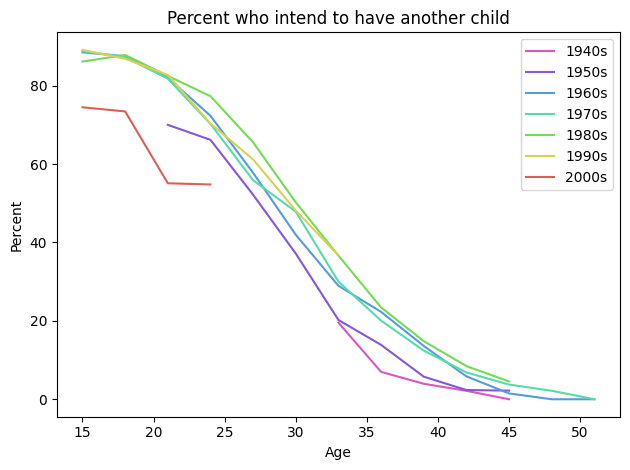

<IPython.core.display.Javascript object>

In [118]:
plot_table(table)
decorate(
    title="Percent who intend to have another child", xlabel="Age", ylabel="Percent"
)

In [119]:
from utils import percentile_rows


def plot_table_with_errors(tables, cohorts, ages):

    for cohort in cohorts:
        frame = pd.DataFrame(columns=ages)
        for i, table in enumerate(tables):
            frame.loc[i] = table[cohort]
        low, median, high = percentile_rows(frame, [5, 50, 95])
        plt.fill_between(ages, low, high, alpha=0.2)
        plt.plot(ages, median, label=cohort)

<IPython.core.display.Javascript object>

In [120]:
tables = [make_table(resample_by_cycle(df), "intent_yes") * 100 for i in range(101)]

<IPython.core.display.Javascript object>

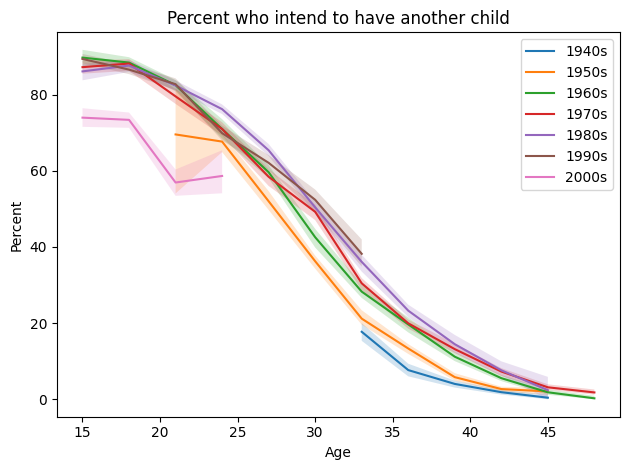

<IPython.core.display.Javascript object>

In [121]:
plot_table_with_errors(tables, cohorts, ages)
decorate(
    title="Percent who intend to have another child", xlabel="Age", ylabel="Percent"
)

In [96]:
tables = [make_table(resample_by_cycle(df), "parity") for i in range(101)]

<IPython.core.display.Javascript object>

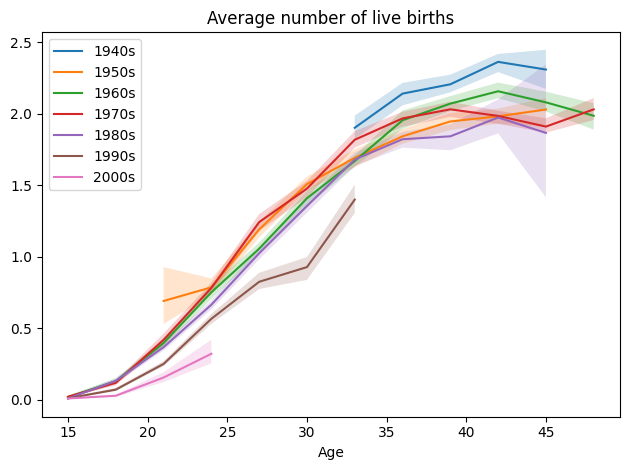

<IPython.core.display.Javascript object>

In [97]:
plot_table_with_errors(tables, cohorts, ages)
decorate(title="Average number of live births", xlabel="Age")

In [100]:
tables = [make_table(resample_by_cycle(df), "addexp") for i in range(101)]

<IPython.core.display.Javascript object>

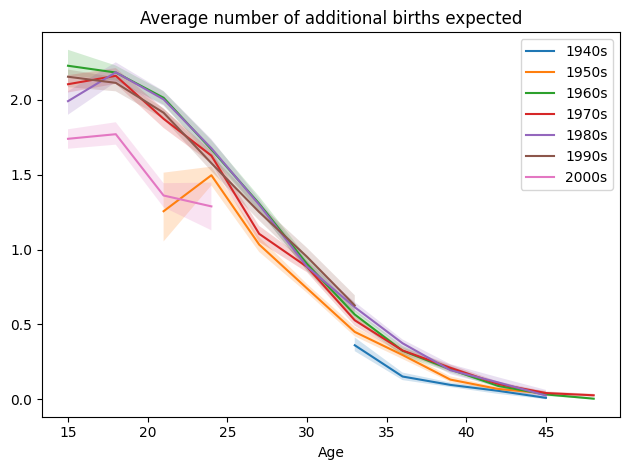

<IPython.core.display.Javascript object>

In [101]:
plot_table_with_errors(tables, cohorts, ages)
decorate(title="Average number of additional births expected", xlabel="Age")

In [199]:
subset = sample.query("birth_index >= 60").copy()
subset["sqrt_parity"] = np.sqrt(subset["parity"])
subset["age2"] = (subset["ager"] - 30) ** 2
subset["age3"] = (subset["ager"] - 30) ** 3

<IPython.core.display.Javascript object>

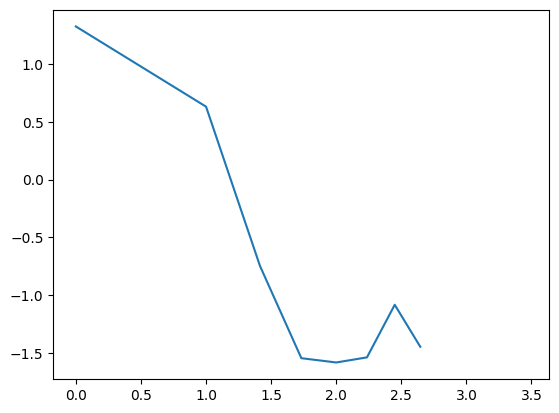

<IPython.core.display.Javascript object>

In [200]:
from scipy.special import logit

middle = subset.query("age_group >= 21 and age_group <= 33")
intent_series = middle.groupby("parity")["intent_yes"].mean()
x = np.sqrt(intent_series.index)
y = logit(intent_series)
plt.plot(x, y)

In [201]:
intention = subset.query("age_group <= 21").groupby("birth_index")["addexp"].mean()
intention

birth_index
60     2.102333
70     2.074493
80     2.081044
90     2.045227
100    1.666735
Name: addexp, dtype: float64

<IPython.core.display.Javascript object>

In [202]:
subset["intention"] = intention[subset["birth_index"]].values
subset["intention"].mean()

2.0610470761081854

<IPython.core.display.Javascript object>

In [203]:
import statsmodels.formula.api as smf

formula = "intent_yes ~ ager + sqrt_parity + C(birth_index)"
results = smf.logit(formula=formula, data=subset).fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.447182
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             intent_yes   No. Observations:                60952
Model:                          Logit   Df Residuals:                    60945
Method:                           MLE   Df Model:                            6
Date:                Sat, 28 Dec 2024   Pseudo R-squ.:                  0.3547
Time:                        15:52:00   Log-Likelihood:                -27257.
converged:                       True   LL-Null:                       -42237.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.0959      0.056     91.304      0.000       4.987       5.205
C(birth_index)[T.70]      0.0272      0.030      0.896      0.370      -0.032       0.087
C(birth_index)[T.80]      0.2492      0.030      8.310      0.000       0.190       0.308
C(birth_index)[T.90]     -0.1653      0.037     -4.498      0.000      -0.237      -0.093
C(birth_index)[T.100]    -1.5499      0.053    -28.997      0.000      -1.655      -1.445
ager                     -0.1465      0.002    -85.090      0.000      -0.150      -0.143
sqrt_parity              -1.1166      0.016    -68.885      0.000      -1.148      -1.085
=========================================================================================
"""

<IPython.core.display.Javascript object>

In [204]:
subset["parity"].mean(), subset["parity"].var()

(1.1002264076650479, 1.8572741526074095)

<IPython.core.display.Javascript object>

In [209]:
formula = "sqrt_parity ~ ager + age2 + age3 + C(birth_index)"
results = smf.ols(formula=formula, data=subset).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_parity   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     4980.
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:52:59   Log-Likelihood:                -55930.
No. Observations:               60952   AIC:                         1.119e+05
Df Residuals:                   60944   BIC:                         1.119e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.8463      0.021    -41.063      0.000      -0.887      -0.806
C(birth_index)[T.70]      0.0203      0.007      3.042      0.002       0.007       0.033
C(birth_index)[T.80]     -0.0339      0.007     -4.775      0.000      -0.048      -0.020
C(birth_index)[T.90]     -0.0986      0.008    -11.613      0.000      -0.115      -0.082
C(birth_index)[T.100]    -0.0796      0.014     -5.745      0.000      -0.107      -0.052
ager                      0.0583      0.001     90.753      0.000       0.057       0.060
age2                     -0.0013   3.53e-05    -36.667      0.000      -0.001      -0.001
age3                  -6.731e-05    3.6e-06    -18.704      0.000   -7.44e-05   -6.03e-05
==============================================================================
Omnibus:                      208.431   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.833
Skew:                          -0.079   Prob(JB):                     1.47e-39
Kurtosis:                       2.786   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [212]:
pred_df = pd.DataFrame(dtype=float)
pred_df["ager"] = np.arange(15, 51, 3)
pred_df["age2"] = (pred_df["ager"] - 30) ** 2
pred_df["age3"] = (pred_df["ager"] - 30) ** 3
pred_df["birth_index"] = 100

pred = results.predict(pred_df) ** 2
pred = pd.Series(pred.values, pred_df["ager"])

<IPython.core.display.Javascript object>

<Axes: xlabel='ager'>

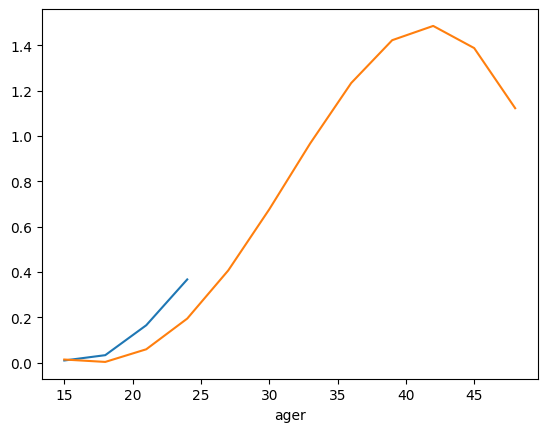

<IPython.core.display.Javascript object>

In [213]:
table = make_table(subset, "parity")
table["2000s"].plot()
pred.plot()